
### Introduction 
Parkinson disease is most commonly known to cause voice alterations.89 percent of people with Parkinson's disease (PD) experience speech and voice disorders. here in this study such voice recordings of 195 observations with 24 variables are done by research institutes. Dimension reduction technique can provide us opportunity to understand impactful variables in order to understand wether perosn has that disease or not based on voice recondings.
We are using here dimension reduction techniques along with scaling methods to detect healthy people from those with Parkinson Disease,our focus is on  "status" column which is set to 0 for healthy and 1 for affected person.we will check which combination of dimension reduction is with best accuracy and which dimension reduction is not good also which techniques is not even possible for prediction of model.
### Acknowledgements:
The dataset was created by Max Little of the University of Oxford & National Centre for Voice and Speech, Denver, Colorado.
Data is utilised from UCI data repository.
https://www.kaggle.com/itsmesunil/parkinsons

In [1]:
## Fundamental Python Libraries

import pandas as pd                                                       
import numpy as np 
import math
import copy
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"

## Data Visualization Libraries

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns                                                   
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## Data Pre-Processing Libraries

from sklearn.model_selection import train_test_split

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler                     ## median and quntile
from sklearn.preprocessing import MinMaxScaler                     ## Normalization Technique


## Dimension Reduction Libraries

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import NMF                             ## Non Negative Matrix Factorization
from sklearn.manifold import TSNE

## Regression Libraries

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



## Evaluation Metrics Libraries

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing




We have now downloaded necessary packages to support our analysis. next steps are data preparation for model after that we may proceed to test and train data prior to scaling and dimension reduction.

In [3]:
data = pd.read_csv("D:\\DATASCIENCEMASTER\\Unsupervised\\dimensionred.csv")

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


To see all of columns display.max_columns is used.

In [5]:
pd.set_option("display.max_columns",None)

In [6]:
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
data.shape

(195, 24)

In [9]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

name is not necessary column as its an identifier hence we got rid of that column.

In [10]:
data = data.drop("name", axis = 1)

In [11]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


we are going to check correlation by below pearson method.

In [12]:
data.corr(method = "pearson")

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


from correlation matrix it is been observed that few variables are highly correlated amongst themselves however to get better picture we perform visualization of it. visualization can give clear idea in easier way than value based observations in above code.

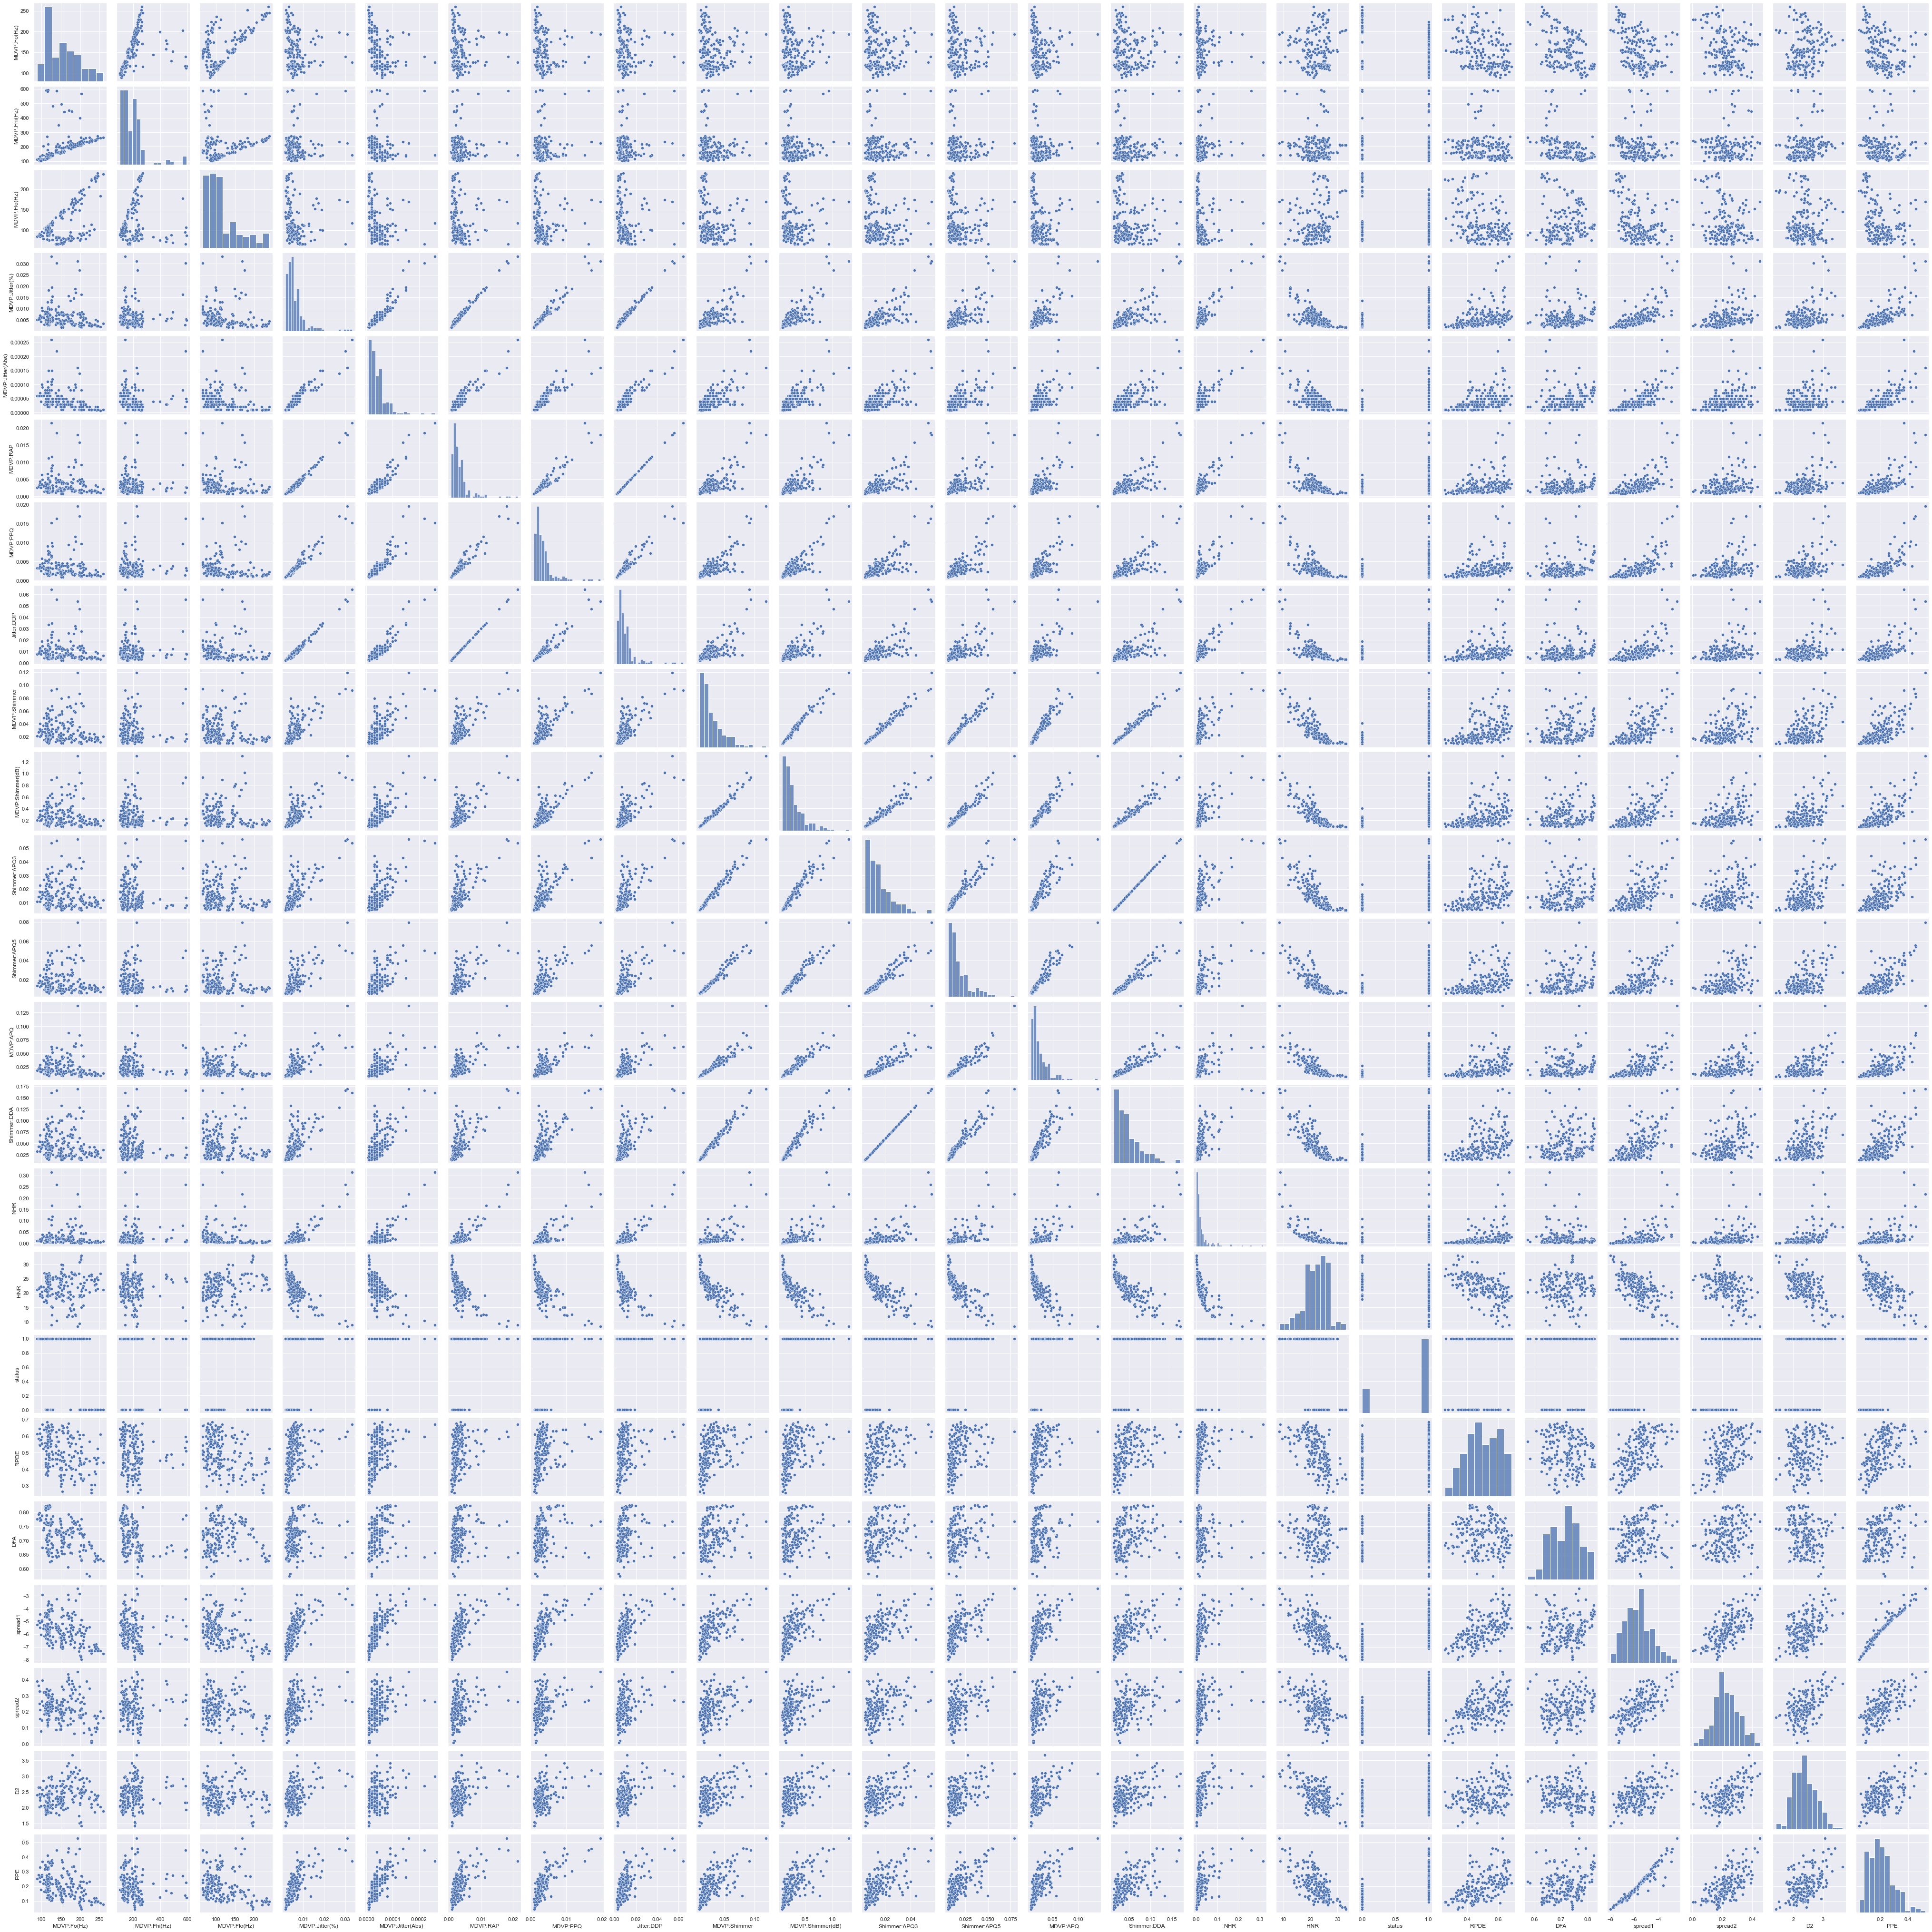

In [13]:
sns.pairplot(data)

high multicolinearity observed amongst variables and further it will make predictive model less reliable.Also high number of dimensions as in above case may lead to overfitting problem where model can work accurately with training data however may fail to produce an equally efficient results with test data.hence dimension reduction technique should be applied before model implementation.

before splitting data into train and test we have to split data into features and target. target variable is "status" which is response of person suffering from disease in analysis- parkinson.either response can be 0 or 1.

In [15]:
X = data.drop("status",axis = 1)
y = data["status"]

In [16]:
## Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

we declare in above line train and test split but significant parameter here is random_state = 5 that can keep results same whenever we split data orelse each time results may differ.

In [17]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
12,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,0.112,0.00656,0.00717,0.01140,0.01968,0.00581,25.703,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
130,120.289,128.143,100.209,0.00492,0.00004,0.00269,0.00238,0.00808,0.01412,0.125,0.00703,0.00820,0.01194,0.02110,0.01610,23.949,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923
145,223.361,263.872,87.638,0.00352,0.00002,0.00169,0.00188,0.00506,0.02536,0.225,0.01379,0.01478,0.01909,0.04137,0.01493,20.366,0.566849,0.574282,-5.456811,0.345238,2.840556,0.232861
59,114.847,271.314,104.680,0.00867,0.00008,0.00373,0.00520,0.01120,0.03225,0.350,0.01805,0.01974,0.02519,0.05414,0.01143,21.660,0.547975,0.817396,-4.609161,0.221711,1.831691,0.316395
178,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.142,0.00839,0.00956,0.01309,0.02518,0.00488,24.412,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306


multiple scaling techniques can be used as our goal is to find right combination of dimension reduction techique and scaling techinque for specific model. 

In [18]:
## Standardization / Normalization Rule : Fit with train and transform with train and test

scaler_1 = StandardScaler()
scaler_2 = MinMaxScaler()
scaler_3 = RobustScaler()

scaler_1.fit(X_train)
scaler_2.fit(X_train)
scaler_3.fit(X_train)                                        ## fit_transform(data) : fit + transform

X_train_1 = scaler_1.transform(X_train)                      ## use fit only with training dataset for feature space
X_train_2 = scaler_2.transform(X_train)                      ## use transform with train and test for feature space
X_train_3 = scaler_3.transform(X_train)
                        
X_test_1 = scaler_1.transform(X_test)
X_test_2 = scaler_2.transform(X_test)
X_test_3 = scaler_3.transform(X_test)

StandardScaler()

MinMaxScaler()

RobustScaler()

StandardScaler() we used to standardise data. MinMaxScaler() is used to normalise the data in the range 0 to 1. RobustScaler() is used to standardise the data while dealing outliers as well.

In [19]:
X_train_1[0:5]

array([[-0.40504707, -0.37676974,  0.36237036, -0.65975542, -0.68487941,
        -0.70829647, -0.67332683, -0.70732692, -0.87452962, -0.83475203,
        -0.87772932, -0.86061429, -0.69505592, -0.87776275, -0.45747506,
         0.858047  , -0.36434745, -1.32316203, -0.78508275, -0.87583123,
        -0.87318575, -0.75734001],
       [-0.80656594, -0.78028146, -0.36637291, -0.25220451, -0.10163833,
        -0.20066834, -0.36983487, -0.19969684, -0.79438193, -0.76944352,
        -0.8313888 , -0.77700828, -0.66493755, -0.83109218, -0.20462795,
         0.46460942, -0.30098449,  0.10722894, -0.40410531, -0.270843  ,
         0.46519519, -0.40286683],
       [ 1.68098311,  0.94617072, -0.66125274, -0.53892374, -0.68487941,
        -0.53684591, -0.54835955, -0.53811689, -0.20558452, -0.26707041,
        -0.16487421, -0.24290387, -0.26614809, -0.16488637, -0.23337733,
        -0.33908888,  0.66191032, -2.66767285,  0.22351693,  1.41503324,
         1.27295973,  0.30738858],
       [-0.93790367

In [20]:
type(X_train_1)

numpy.ndarray

data frame is transformed into an array after we applied sclaling techniques.

### Dimension Reduction Techniques with scaling 
multiple domension reduction techniqies are available PCA, factor analysis and non negative matrix factorisation. we will compare which dimension reduction technique will perform better for given scenario.

In [21]:
### StandardScalar + PCA

pca = PCA(n_components = 2)

pca.fit(X_train_1)

x_train_pca = pca.transform(X_train_1)
x_test_pca = pca.transform(X_test_1)

#let's check the shape of X_pca array
print("shape of x_train_pca", x_train_pca.shape)

print('')

ex_variance=np.var(x_train_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

ex_variance_1 = np.var(x_test_pca,axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
print(ex_variance_ratio_1)

PCA(n_components=2)

shape of x_train_pca (136, 2)

[0.83815664 0.16184336]
[0.8127773 0.1872227]


combination of PCA and standard scalar is being effective in reducing dimension without compromising explained variance. dimension reduced from 24 to 2.

In [22]:
### PCA with Min Max

pca = PCA(n_components = 2)

pca.fit(X_train_2)

x_train_pca_2 = pca.transform(X_train_2)
x_test_pca_2 = pca.transform(X_test_2)

#let's check the shape of X_pca array
print("shape of x_train_pca", x_train_pca_2.shape)

print('')

ex_variance=np.var(x_train_pca_2,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

ex_variance_1 = np.var(x_test_pca_2,axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
print(ex_variance_ratio_1) 

PCA(n_components=2)

shape of x_train_pca (136, 2)

[0.76264629 0.23735371]
[0.74445479 0.25554521]


initially with combination of standard scaler and PCA we have proportion of explained variance across the components as around 83% and 16% respectively in training data which was skewed. however with Minmax scalar and PCA we have proportion of explained variance across the components as around 76% and 23% respectively which is more proportionate distribution of explained variance in training data.

In [23]:
x_train_pca[:5]

array([[-3.19460446,  0.04190882],
       [-1.73577739, -0.96025343],
       [-0.63508647,  0.98755944],
       [ 1.38108501, -1.4859199 ],
       [-2.51659682, -0.21804281]])

In [25]:
### Robust scalar + PCA

pca = PCA(n_components = 2)

pca.fit(X_train_3)

x_train_pca_3 = pca.transform(X_train_3)
x_test_pca_3 = pca.transform(X_test_3)

#let's check the shape of X_pca array
print("shape of x_train_pca", x_train_pca_3.shape)

print('')

ex_variance=np.var(x_train_pca_3,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

ex_variance_1 = np.var(x_test_pca_3,axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
print(ex_variance_ratio_1)

PCA(n_components=2)

shape of x_train_pca (136, 2)

[0.89168187 0.10831813]
[0.88908507 0.11091493]


in this case Robust scaler has not performed better than PCA which suggest that there are not many outliers in data. Robust scalar use is irrelevant for further analyis.

In [26]:
### Factor Analysis

fa = FactorAnalysis(n_components = 2)

fa.fit(X_train_1)

x_train_fa = fa.transform(X_train_1)
x_test_fa = fa.transform(X_test_1)

#let's check the shape of X_pca array
print("shape of x_train_fa", x_train_fa.shape)

print('')

ex_variance=np.var(x_train_fa,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

ex_variance_1 = np.var(x_test_fa,axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
print(ex_variance_ratio_1)

FactorAnalysis(n_components=2)

shape of x_train_fa (136, 2)

[0.50007656 0.49992344]
[0.56290915 0.43709085]


In [25]:
x_train_fa[:5]

array([[ 0.03396776, -0.41470706],
       [-1.05855623, -0.29987777],
       [ 0.1322048 ,  1.90743006],
       [-0.01171787,  0.50012543],
       [ 0.87648627, -0.84866816]])

In [31]:
### Factor Analysis with Min Max

fa = FactorAnalysis(n_components = 2)

fa.fit(X_train_2)

x_train_fa_2 = fa.transform(X_train_2)
x_test_fa_2 = fa.transform(X_test_2)

#let's check the shape of X_pca array
print("shape of x_train_fa", x_train_fa_2.shape)

print('')

ex_variance=np.var(x_train_fa_2,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

ex_variance_1 = np.var(x_test_fa_2,axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
print(ex_variance_ratio_1)

FactorAnalysis(n_components=2)

shape of x_train_fa (136, 2)

[0.50007656 0.49992344]
[0.56290915 0.43709085]


In [32]:
### StandardScalar + NMF Analysis

nmf = NMF(n_components = 2)

nmf.fit(X_train_1)

x_train_nmf = nmf.transform(X_train_1)
x_test_nmf = nmf.transform(X_test_1)

#let's check the shape of X_pca array
print("shape of x_train_nmf", x_train_nmf.shape)

print('')

ex_variance=np.var(x_train_nmf,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

ex_variance_1 = np.var(x_test_nmf,axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
print(ex_variance_ratio_1)

ValueError: Negative values in data passed to NMF (input X)

Non negative matrix factorisation (NMF) does not accept negative values as input and it has given error because NMF was used on a standardised data which comprises of both + and - values. Hence NMF should be only used on Normalised data. 

In [33]:
### NMF with MinMax

### NMF Analysis

nmf = NMF(n_components = 2)

nmf.fit(X_train_2)

x_train_nmf = nmf.transform(X_train_2)
x_test_nmf = nmf.transform(X_test_2)

#let's check the shape of X_pca array
print("shape of x_train_nmf", x_train_nmf.shape)

print('')

ex_variance=np.var(x_train_nmf,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

ex_variance_1 = np.var(x_test_nmf,axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
print(ex_variance_ratio_1)

NMF(n_components=2)

ValueError: Negative values in data passed to NMF (input X)

Here the source data has negative values hence even the normalisation will not make them positive. hence we have get error while we tried using NMF. As NMF doesnt accept negative values. 

In [34]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

### Logistic Regression with Reduced Dimensions


In [39]:
model = LogisticRegression()

In [41]:
model.fit(x_train_pca, y_train)
    
y_pred = model.predict(x_test_pca)
    
print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_test, y_pred))

LogisticRegression()

The Accuracy Score For LogisticRegression() Model Is :   0.8135593220338984


StandardScalar + PCA is giving us highest accuracy - we have more accurate predictions in termns of analysis if person is suffering from parkinson disease or not.

In [42]:
model.fit(x_train_pca_2, y_train)
    
y_pred = model.predict(x_test_pca_2)
    
print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_test, y_pred))

LogisticRegression()

The Accuracy Score For LogisticRegression() Model Is :   0.7966101694915254


In [43]:
model.fit(x_train_fa, y_train)
    
y_pred = model.predict(x_test_fa)
    
print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_test, y_pred))

LogisticRegression()

The Accuracy Score For LogisticRegression() Model Is :   0.7457627118644068


In [44]:
model.fit(x_train_fa_2, y_train)
    
y_pred = model.predict(x_test_fa_2)
    
print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_test, y_pred))

LogisticRegression()

The Accuracy Score For LogisticRegression() Model Is :   0.7457627118644068


### Conclusion.

rather than using some of dimesion reduction techniques and moving further to regressions is effective but here we find efficient process accompnied with scaling techniques. We find optimal process to increase accuracy of our alogorithm, PCA with standard scalar standardisation techniques gives maximum accuracy amongst all dimension reduction techniques and scaling combinations. Also obvious from observations above NMF doesnt accept negative values.